<a href="https://colab.research.google.com/github/sharon-1234/Fmml/blob/main/FMML_Aug'22_M9_L2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Foundation of Modern Machine Learning
## Module 9: Neural Networks
## Lab 2: Using MLP for multiclass classification
#### Module Coordinator: Shantanu Agrawal




Till now, we got to know what is MLP, how it can be used for classification. We have done the single class classification in the previous lab session.

In this notebook we will try to use an MLP for multiclass classification on the iris dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# Data preparation

In [2]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Load the iris dataset
iris = load_iris()
X = iris['data']
y = iris['target']
names = iris['target_names']
feature_names = iris['feature_names']

# Scale data to have mean 0 and variance 1
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data set into training and testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=2)

# Visualising dataset

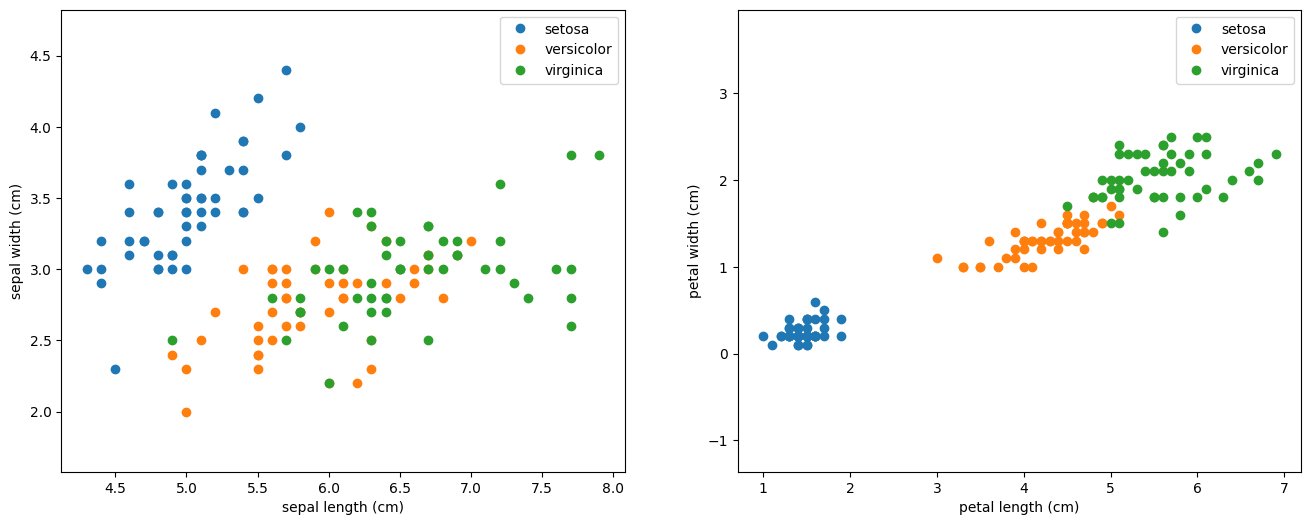

In [3]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 6))
for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax1.plot(X_plot[:, 0], X_plot[:, 1],
             linestyle='none',
             marker='o',
             label=target_name)
ax1.set_xlabel(feature_names[0])
ax1.set_ylabel(feature_names[1])
ax1.axis('equal')
ax1.legend();

for target, target_name in enumerate(names):
    X_plot = X[y == target]
    ax2.plot(X_plot[:, 2], X_plot[:, 3],
             linestyle='none',
             marker='o',
             label=target_name)
ax2.set_xlabel(feature_names[2])
ax2.set_ylabel(feature_names[3])
ax2.axis('equal')
ax2.legend();


# Observing the dataset

Thus, we can observe the dataset and see that there are *3 classes, setosa, versicolor, and virginica*.

There are *4 features, sepal width, sepal length, petal width, petal length*.

# MLP for multiclass classification

In [4]:
import torch
import torch.nn.functional as F
import torch.nn as nn
from torch.autograd import Variable
import tqdm

In [5]:
# Defining the model architecture
class Model(nn.Module):
    def __init__(self, input_dim):
        super(Model, self).__init__()
        self.layer1 = nn.Linear(input_dim, 50)
        self.layer2 = nn.Linear(50, 50)
        self.layer3 = nn.Linear(50, 3)

    def forward(self, x):
        x = F.relu(self.layer1(x))
        x = F.relu(self.layer2(x))
        x = F.softmax(self.layer3(x), dim=1)
        return x

In [6]:
# Instantiating the model, using Adam optimiser, and Cross Entropy Loss, which is quite commonlu used for classification tasks.
model     = Model(X_train.shape[1])
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
loss_fn   = nn.CrossEntropyLoss()

# Train the model

In [7]:
# Train for 100 epochs
EPOCHS  = 100
X_train = torch.from_numpy(X_train).float()
X_test= torch.from_numpy(X_test).float()
y_test = torch.from_numpy(y_test)
y_train = torch.from_numpy(y_train)


loss_list     = np.zeros((EPOCHS,))
accuracy_list = np.zeros((EPOCHS,))

for epoch in tqdm.trange(EPOCHS):
    y_pred = model(X_train)
    loss = loss_fn(y_pred, y_train)
    loss_list[epoch] = loss.item()

    # Zero gradients
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

    with torch.no_grad():
        y_pred = model(X_test)
        correct = (torch.argmax(y_pred, dim=1) == y_test).type(torch.FloatTensor)
        accuracy_list[epoch] = correct.mean()

100%|██████████| 100/100 [00:01<00:00, 76.23it/s]


# Plot training progress

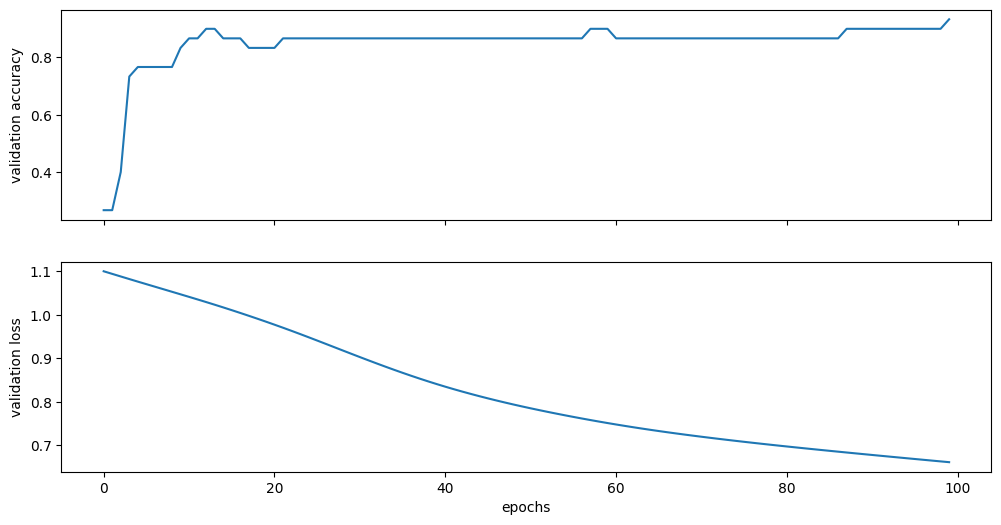

In [8]:
fig, (ax1, ax2) = plt.subplots(2, figsize=(12, 6), sharex=True)

ax1.plot(accuracy_list)
ax1.set_ylabel("validation accuracy")
ax2.plot(loss_list)
ax2.set_ylabel("validation loss")
ax2.set_xlabel("epochs");

# Experiment with the neural network architecture


1.   Try changing the number of hidden layers.
2.   Try changing the number of neurons in the hidden layer.
3.   Try using a different activation function.




Can you observe any changes?

ANSWERS:-
1)

In [9]:
from sklearn.neural_network import MLPClassifier

# Define the data for AND, OR, and NOR gates using -1/+1 logic
X_AND = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_AND = [-1, -1, -1, 1]

X_OR = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_OR = [-1, 1, 1, 1]

X_NOR = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_NOR = [1, -1, -1, -1]

# Define and train MLP classifiers with different numbers of hidden layers
mlp_AND_1_layer = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='lbfgs')
mlp_AND_1_layer.fit(X_AND, y_AND)

mlp_AND_2_layers = MLPClassifier(hidden_layer_sizes=(2, 2), activation='tanh', solver='lbfgs')
mlp_AND_2_layers.fit(X_AND, y_AND)

mlp_OR_1_layer = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='lbfgs')
mlp_OR_1_layer.fit(X_OR, y_OR)

mlp_OR_2_layers = MLPClassifier(hidden_layer_sizes=(2, 2), activation='tanh', solver='lbfgs')
mlp_OR_2_layers.fit(X_OR, y_OR)

mlp_NOR_1_layer = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='lbfgs')
mlp_NOR_1_layer.fit(X_NOR, y_NOR)

mlp_NOR_2_layers = MLPClassifier(hidden_layer_sizes=(2, 2), activation='tanh', solver='lbfgs')
mlp_NOR_2_layers.fit(X_NOR, y_NOR)

# Test the classifiers
test_cases = [[-1, -1], [-1, 1], [1, -1], [1, 1]]

print("MLP with 1 hidden layer for AND gate:")
for test_case in test_cases:
    prediction = mlp_AND_1_layer.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 2 hidden layers for AND gate:")
for test_case in test_cases:
    prediction = mlp_AND_2_layers.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 1 hidden layer for OR gate:")
for test_case in test_cases:
    prediction = mlp_OR_1_layer.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 2 hidden layers for OR gate:")
for test_case in test_cases:
    prediction = mlp_OR_2_layers.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 1 hidden layer for NOR gate:")
for test_case in test_cases:
    prediction = mlp_NOR_1_layer.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 2 hidden layers for NOR gate:")
for test_case in test_cases:
    prediction = mlp_NOR_2_layers.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")


MLP with 1 hidden layer for AND gate:
[-1, -1] -> -1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> 1

MLP with 2 hidden layers for AND gate:
[-1, -1] -> -1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> 1

MLP with 1 hidden layer for OR gate:
[-1, -1] -> -1
[-1, 1] -> 1
[1, -1] -> 1
[1, 1] -> 1

MLP with 2 hidden layers for OR gate:
[-1, -1] -> -1
[-1, 1] -> 1
[1, -1] -> 1
[1, 1] -> 1

MLP with 1 hidden layer for NOR gate:
[-1, -1] -> 1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> -1

MLP with 2 hidden layers for NOR gate:
[-1, -1] -> 1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> -1


2)ANSWER:-

In [10]:
from sklearn.neural_network import MLPClassifier

# Define the data for AND, OR, and NOR gates using -1/+1 logic
X_AND = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_AND = [-1, -1, -1, 1]

X_OR = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_OR = [-1, 1, 1, 1]

X_NOR = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_NOR = [1, -1, -1, -1]

# Define and train MLP classifiers with different numbers of neurons in the hidden layer
mlp_AND_2_neurons = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='lbfgs')
mlp_AND_2_neurons.fit(X_AND, y_AND)

mlp_AND_4_neurons = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', solver='lbfgs')
mlp_AND_4_neurons.fit(X_AND, y_AND)

mlp_OR_2_neurons = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='lbfgs')
mlp_OR_2_neurons.fit(X_OR, y_OR)

mlp_OR_4_neurons = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', solver='lbfgs')
mlp_OR_4_neurons.fit(X_OR, y_OR)

mlp_NOR_2_neurons = MLPClassifier(hidden_layer_sizes=(2,), activation='tanh', solver='lbfgs')
mlp_NOR_2_neurons.fit(X_NOR, y_NOR)

mlp_NOR_4_neurons = MLPClassifier(hidden_layer_sizes=(4,), activation='tanh', solver='lbfgs')
mlp_NOR_4_neurons.fit(X_NOR, y_NOR)

# Test the classifiers
test_cases = [[-1, -1], [-1, 1], [1, -1], [1, 1]]

print("MLP with 2 neurons in hidden layer for AND gate:")
for test_case in test_cases:
    prediction = mlp_AND_2_neurons.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 4 neurons in hidden layer for AND gate:")
for test_case in test_cases:
    prediction = mlp_AND_4_neurons.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 2 neurons in hidden layer for OR gate:")
for test_case in test_cases:
    prediction = mlp_OR_2_neurons.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 4 neurons in hidden layer for OR gate:")
for test_case in test_cases:
    prediction = mlp_OR_4_neurons.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 2 neurons in hidden layer for NOR gate:")
for test_case in test_cases:
    prediction = mlp_NOR_2_neurons.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with 4 neurons in hidden layer for NOR gate:")
for test_case in test_cases:
    prediction = mlp_NOR_4_neurons.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")


MLP with 2 neurons in hidden layer for AND gate:
[-1, -1] -> -1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> 1

MLP with 4 neurons in hidden layer for AND gate:
[-1, -1] -> -1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> 1

MLP with 2 neurons in hidden layer for OR gate:
[-1, -1] -> -1
[-1, 1] -> 1
[1, -1] -> 1
[1, 1] -> 1

MLP with 4 neurons in hidden layer for OR gate:
[-1, -1] -> -1
[-1, 1] -> 1
[1, -1] -> 1
[1, 1] -> 1

MLP with 2 neurons in hidden layer for NOR gate:
[-1, -1] -> 1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> -1

MLP with 4 neurons in hidden layer for NOR gate:
[-1, -1] -> 1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> -1


3)ANSWER:-

In [11]:
from sklearn.neural_network import MLPClassifier

# Define the data for AND, OR, and NOR gates using -1/+1 logic
X_AND = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_AND = [-1, -1, -1, 1]

X_OR = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_OR = [-1, 1, 1, 1]

X_NOR = [[-1, -1], [-1, 1], [1, -1], [1, 1]]
y_NOR = [1, -1, -1, -1]

# Define and train MLP classifiers with ReLU activation function
mlp_AND_relu = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='lbfgs')
mlp_AND_relu.fit(X_AND, y_AND)

mlp_OR_relu = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='lbfgs')
mlp_OR_relu.fit(X_OR, y_OR)

mlp_NOR_relu = MLPClassifier(hidden_layer_sizes=(2,), activation='relu', solver='lbfgs')
mlp_NOR_relu.fit(X_NOR, y_NOR)

# Test the classifiers
test_cases = [[-1, -1], [-1, 1], [1, -1], [1, 1]]

print("MLP with ReLU activation function for AND gate:")
for test_case in test_cases:
    prediction = mlp_AND_relu.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with ReLU activation function for OR gate:")
for test_case in test_cases:
    prediction = mlp_OR_relu.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")

print("\nMLP with ReLU activation function for NOR gate:")
for test_case in test_cases:
    prediction = mlp_NOR_relu.predict([test_case])[0]
    print(f"{test_case} -> {prediction}")


MLP with ReLU activation function for AND gate:
[-1, -1] -> -1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> 1

MLP with ReLU activation function for OR gate:
[-1, -1] -> -1
[-1, 1] -> 1
[1, -1] -> 1
[1, 1] -> 1

MLP with ReLU activation function for NOR gate:
[-1, -1] -> -1
[-1, 1] -> -1
[1, -1] -> -1
[1, 1] -> -1


In this code, we create MLP classifiers with the ReLU activation function for the hidden layer. We train them on the respective logic gate datasets and then test their performance on various input combinations. By observing the results, we can analyze how using the ReLU activation function affects the MLP's ability to learn and represent the underlying logic functions.










